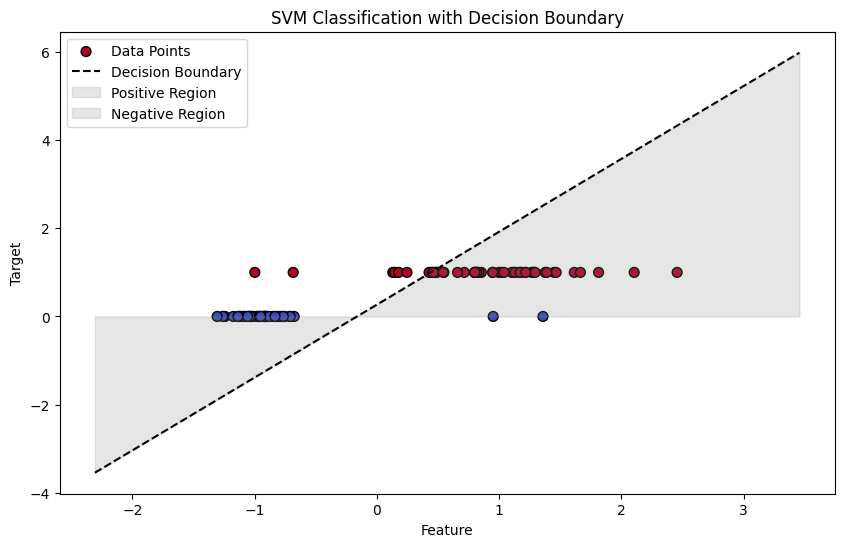

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate a dataset with a single feature
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Create and fit the SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X.reshape(-1, 1), y)

# Predict on a range of values to plot the decision boundary
x_range = np.linspace(X.min() - 1, X.max() + 1, 500)
decision_boundary = model.decision_function(x_range.reshape(-1, 1))

# Plotting the data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=y, edgecolor='k', s=50, cmap='coolwarm', label='Data Points')
plt.plot(x_range, decision_boundary, 'k--', label='Decision Boundary')
plt.fill_between(x_range, decision_boundary, color='gray', alpha=0.2, where=(decision_boundary >= 0), label='Positive Region')
plt.fill_between(x_range, decision_boundary, color='gray', alpha=0.2, where=(decision_boundary < 0), label='Negative Region')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('SVM Classification with Decision Boundary')
plt.legend()
plt.show()


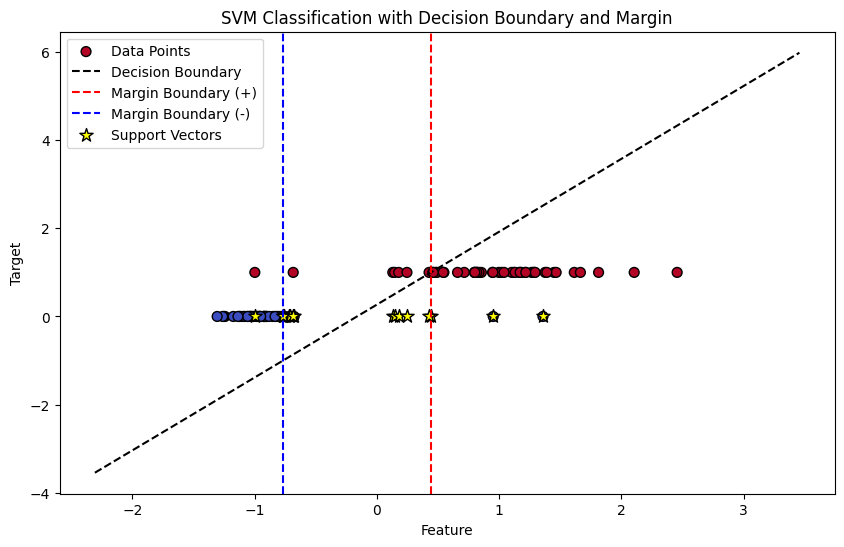

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# Generate a dataset with a single feature
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)

# Create and fit the SVM model
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X.reshape(-1, 1), y)

# Coefficients of the decision function
coef = model.coef_[0]
intercept = model.intercept_[0]

# Compute the margin
margin = 2 / np.linalg.norm(coef)

# Compute the decision boundary
decision_boundary_x = -intercept / coef

# Compute the margin boundaries
margin_up = decision_boundary_x + margin / 2
margin_down = decision_boundary_x - margin / 2

# Create a range of x-values for plotting
x_range = np.linspace(X.min() - 1, X.max() + 1, 500)
decision_boundary = model.decision_function(x_range.reshape(-1, 1))

# Plotting the data and decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=y, edgecolor='k', s=50, cmap='coolwarm', label='Data Points')
plt.plot(x_range, decision_boundary, 'k--', label='Decision Boundary')

# Plot the margin boundaries
plt.axvline(x=margin_up, color='r', linestyle='--', label='Margin Boundary (+)')
plt.axvline(x=margin_down, color='b', linestyle='--', label='Margin Boundary (-)')

# Mark support vectors
support_vectors = model.support_vectors_
plt.scatter(support_vectors, [0] * len(support_vectors), c='yellow', edgecolor='k', s=100, marker='*', label='Support Vectors')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('SVM Classification with Decision Boundary and Margin')
plt.legend()
plt.show()
